In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guava-disease-dataset/dataset_summary.csv
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/72_unsharp_clahe_augmented_6.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/49_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/57_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/97_unsharp_clahe_augmented_3.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/60_unsharp_clahe_augmented_4.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/100_unsharp_clahe_augmented_3.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/26_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDatase

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_dir=r'/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
validation_dir=r'/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

In [4]:
# Parameters
img_size = (512, 512)
batch_size = 32
num_classes = 3

In [5]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [6]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2647 images belonging to 3 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 755 images belonging to 3 classes.


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with 3 classes
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732697666.194498      80 service.cc:145] XLA service 0x7fe08c006380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732697666.194565      80 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-11-27 08:54:36.260539: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,255,255]{3,2,1,0}, f32[32,64,253,253]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backen

 1/83 ━━━━━━━━━━━━━━━━━━━━ 44:57 33s/step - accuracy: 0.4688 - loss: 1.0806

I0000 00:00:1732697679.578840      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/83 ━━━━━━━━━━━━━━━━━━━━ 1:59 2s/step - accuracy: 0.3972 - loss: 5.9105

2024-11-27 08:55:40.546942: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,32,255,255]{3,2,1,0}, f32[23,64,253,253]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-27 08:55:40.647188: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.100362712s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,32,255,255]{3,2,1,0}, f32[23,64,253,253]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv

83/83 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.4953 - loss: 3.1628 - val_accuracy: 0.5881 - val_loss: 0.6249
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7115 - loss: 0.6446 - val_accuracy: 0.8795 - val_loss: 0.3335
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8389 - loss: 0.4225 - val_accuracy: 0.9258 - val_loss: 0.1869
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9030 - loss: 0.2922 - val_accuracy: 0.9351 - val_loss: 0.1646
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9167 - loss: 0.2483 - val_accuracy: 0.9510 - val_loss: 0.1224
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9237 - loss: 0.2220 - val_accuracy: 0.9258 - val_loss: 0.2535
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9350 - loss: 0.1884 - val_accuracy: 0.9430 - val_loss: 0.1323
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9422 - loss: 0.1536 - val_accuracy: 0.9166 - val_loss: 0.

In [11]:
model.save("guava_disease_model.h5")


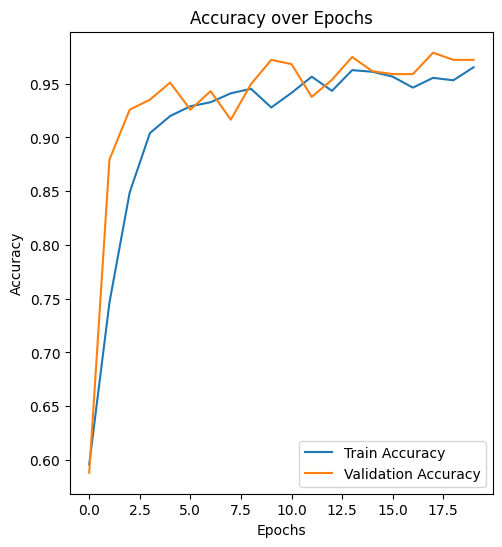

In [12]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

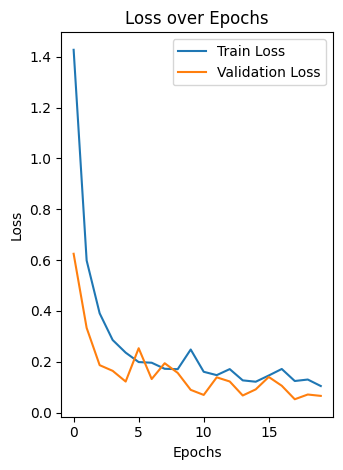

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()